In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error , confusion_matrix 
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score , StratifiedKFold
from sklearn.metrics import mean_squared_error

In [2]:
# Chargement des données
data = load_breast_cancer()
X, y = data.data, data.target

In [3]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Sélection des caractéristiques avec SelectKBest (Filter Method)
select_k_best = SelectKBest(chi2, k=10)
X_train_k_best = select_k_best.fit_transform(X_train, y_train)
X_test_k_best = select_k_best.transform(X_test)

# Modèle de régression logistique avec les caractéristiques sélectionnées
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_k_best, y_train)
y_pred_k_best = log_reg.predict(X_test_k_best)
print(f'Accuracy with SelectKBest: {accuracy_score(y_test, y_pred_k_best):.4f}')



Accuracy with SelectKBest: 0.9708


In [5]:
# Sélection des caractéristiques avec RFE (Wrapper Method)
rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=10)
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train) # Sélection des caractéristiques avec transform method
X_test_rfe = rfe.transform(X_test) # Sélection des caractéristiques avec transform method

log_reg.fit(X_train_rfe, y_train)
y_pred_rfe = log_reg.predict(X_test_rfe)
print(f'Accuracy with RFE: {accuracy_score(y_test, y_pred_rfe):.4f}')

# Sélection des caractéristiques avec RandomForestClassifier (Embedded Method)
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[-10:]  # Sélection des 10 caractéristiques les plus importantes

X_train_embedded = X_train[:, indices]
X_test_embedded = X_test[:, indices]

log_reg.fit(X_train_embedded, y_train)
y_pred_embedded = log_reg.predict(X_test_embedded)
print(f'Accuracy with Embedded Method: {accuracy_score(y_test, y_pred_embedded):.4f}')

Accuracy with RFE: 0.9415
Accuracy with Embedded Method: 0.9825


# **Exemple sans transformation**

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Chargement des données
data = load_breast_cancer()
X, y = data.data, data.target

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Sélection des caractéristiques avec RFE (Wrapper Method)
rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=10)
rfe.fit(X_train, y_train)  # Ajuste RFE sur X_train

# Si vous n'appliquez pas la transformation, vous continuez avec les données d'origine
# Note: C'est une mauvaise pratique car les caractéristiques non sélectionnées affectent encore le modèle

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)  # Entraîne le modèle avec toutes les caractéristiques d'origine
y_pred = log_reg.predict(X_test)  # Prédit les labels pour X_test
print(f'Accuracy without Transform: {accuracy_score(y_test, y_pred):.4f}')


Accuracy without Transform: 0.9766


# Kernel of Mercel


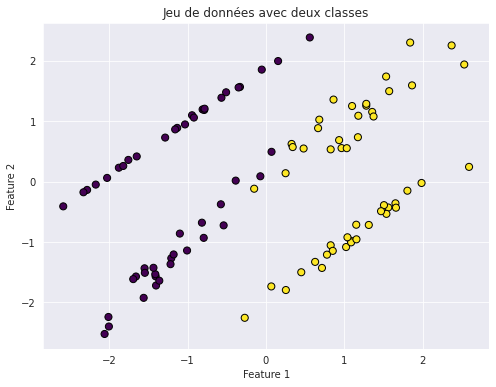

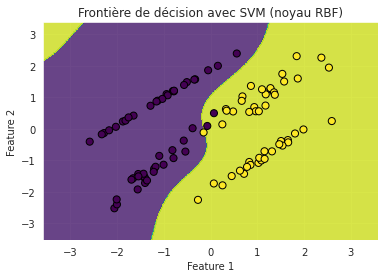

In [7]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Générer un jeu de données
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Afficher les données
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
plt.title('Jeu de données avec deux classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser et entraîner un SVM avec noyau gaussien (RBF)
svm_rbf = SVC(kernel='rbf', gamma='auto')
svm_rbf.fit(X_train, y_train)

# Fonction pour visualiser la frontière de décision
def plot_decision_boundary(model, X, y):
    h = .02  # Pas dans le maillage
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Mettre le résultat dans la couleur
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.8)

    # Afficher aussi les points d'entraînement
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Frontière de décision avec SVM (noyau RBF)')
    plt.show()

# Visualiser la frontière de décision
plot_decision_boundary(svm_rbf, X, y)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Exemple de données d'entraînement
x_train = np.random.rand(100, 10)  # 100 exemples avec 10 caractéristiques chacun
y_train = np.random.randint(2, size=(100,))  # Exemples de labels binaires

# Définition du modèle
model = Sequential([
    Dense(64, activation='relu', input_dim=10),
    Dense(1, activation='sigmoid')
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(x_train, y_train, batch_size=10, epochs=4, validation_split=0.1)

# Après l'entraînement, vous pouvez visualiser les résultats
print(history.history.keys())  # Affiche les métriques disponibles

# Exemple de sortie des métriques d'entraînement et de validation
print("Précision d'entraînement :", history.history['accuracy'])
print("Précision de validation :", history.history['val_accuracy'])


2024-07-10 11:11:38.141956: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

SystemError: initialization of _pywrap_checkpoint_reader raised unreported exception

In [ ]:
import numpy as np

# Generate the data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add x0 = 1 to each instance (for the bias term theta_0)
X_b = np.c_[np.ones((100, 1)), X]  # add bias term
print("-----------------")
print(X_b)
# Compute theta using the normal equation
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

print("Theta found by the normal equation:")
print(theta_best)


In [ ]:
# Step 4: Plot the data points and the best fit line

# Plot the data points
plt.scatter(X, y, color='blue', label='Data points')

# Plot the best fit line
X_new = np.array([[0], [2]])  # Create new data for plotting the line (from x=0 to x=2)
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Add bias term to the new data
y_predict = X_new_b @ theta_best  # Predict y values using the best theta

plt.plot(X_new, y_predict, color='red', label='Best fit line')

# Customize the plot
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Best Fit Line')
plt.legend()
plt.show()

In [ ]:
data = load_iris()
x = data.data
y = data.target

In [ ]:
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model = SVC(kernel='linear')

scores = cross_val_score(model, x, y, cv=kfold)
print(scores)
print(f'Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})')

# Comparison with a simple train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {score:.4f}')

def custom_accuracy(y_true, y_pred):
    correct = sum(y_true == y_pred)
    total = len(y_true)
    return correct / total
score = custom_accuracy(y_test, y_pred)
print(f'Accuracy: {score:.4f}')

        Model  Accuracy
0  SVM Linear  0.900000
1     SVM RBF  0.900000
2    SVM Poly  0.833333


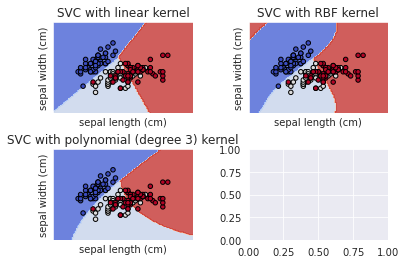

In [15]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
results = {}

models = {
    'SVM Linear': svm.SVC(kernel='linear', C=C),
    'SVM RBF': svm.SVC(kernel='rbf', gamma=0.7, C=C),
    'SVM Poly': svm.SVC(kernel='poly', degree=3, C=C)
}
for name, model in models.items():
    clf = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    results[name] = score  # Store the results
    
results_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy'])
print(results_df)

# title for the plots
titles = (
    "SVC with linear kernel",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models.values(), titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

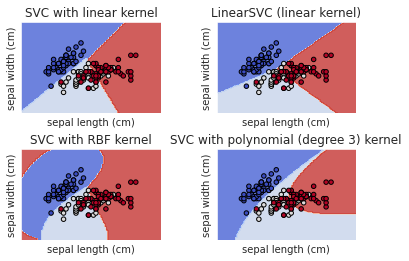

In [11]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000, dual="auto"),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# Breast cancer dataset ML model with SVM

# **Importing the required libraries**

In [18]:
data = load_breast_cancer()
X = data.data
y = data.target

# Exploratory Data Analysis (EDA):

Let's start by exploring the dataset to understand its structure and the relationships between the features.



In [19]:
# Create a DataFrame from the dataset
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [20]:
# Missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [21]:
# Summary statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [22]:
# Summary statistics
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


array([[<AxesSubplot:title={'center':'mean radius'}>,
        <AxesSubplot:title={'center':'mean texture'}>,
        <AxesSubplot:title={'center':'mean perimeter'}>,
        <AxesSubplot:title={'center':'mean area'}>,
        <AxesSubplot:title={'center':'mean smoothness'}>,
        <AxesSubplot:title={'center':'mean compactness'}>],
       [<AxesSubplot:title={'center':'mean concavity'}>,
        <AxesSubplot:title={'center':'mean concave points'}>,
        <AxesSubplot:title={'center':'mean symmetry'}>,
        <AxesSubplot:title={'center':'mean fractal dimension'}>,
        <AxesSubplot:title={'center':'radius error'}>,
        <AxesSubplot:title={'center':'texture error'}>],
       [<AxesSubplot:title={'center':'perimeter error'}>,
        <AxesSubplot:title={'center':'area error'}>,
        <AxesSubplot:title={'center':'smoothness error'}>,
        <AxesSubplot:title={'center':'compactness error'}>,
        <AxesSubplot:title={'center':'concavity error'}>,
        <AxesSubplot:tit

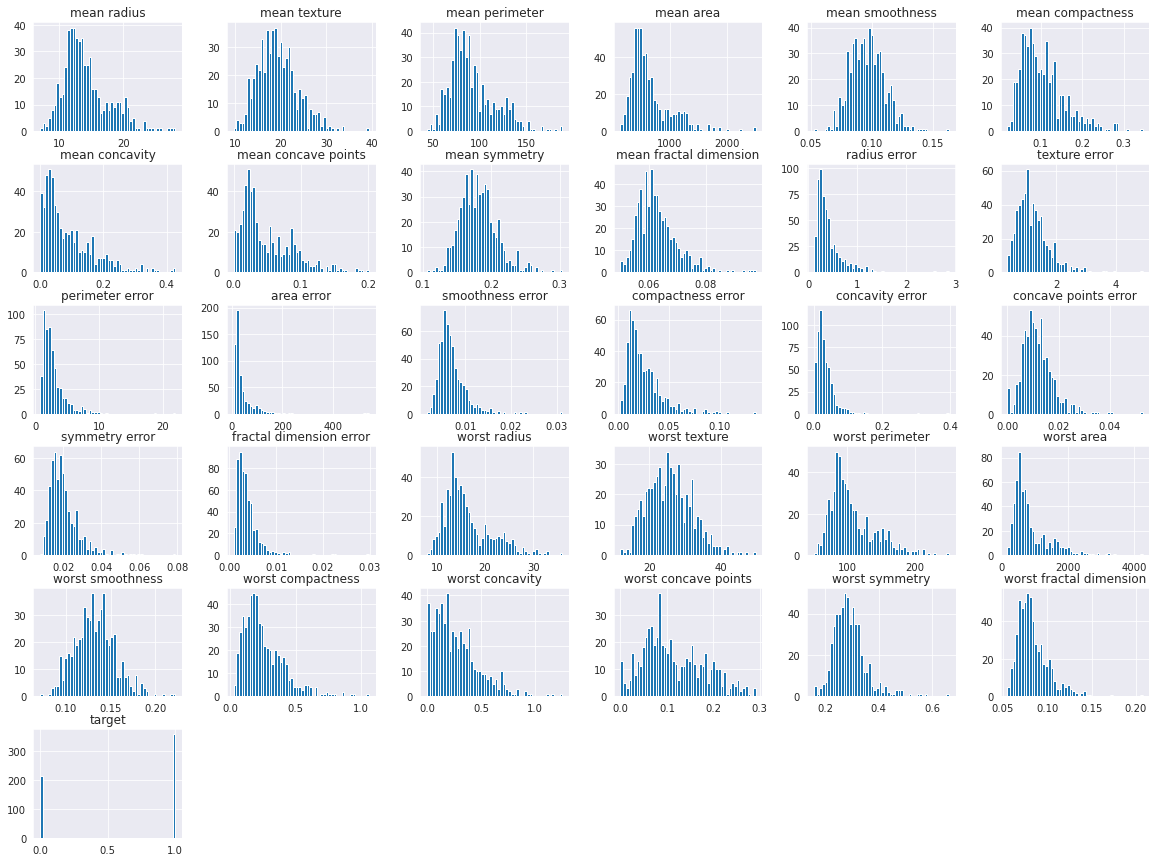

In [23]:
df.hist(bins=50, figsize=(20,15))

<AxesSubplot:>

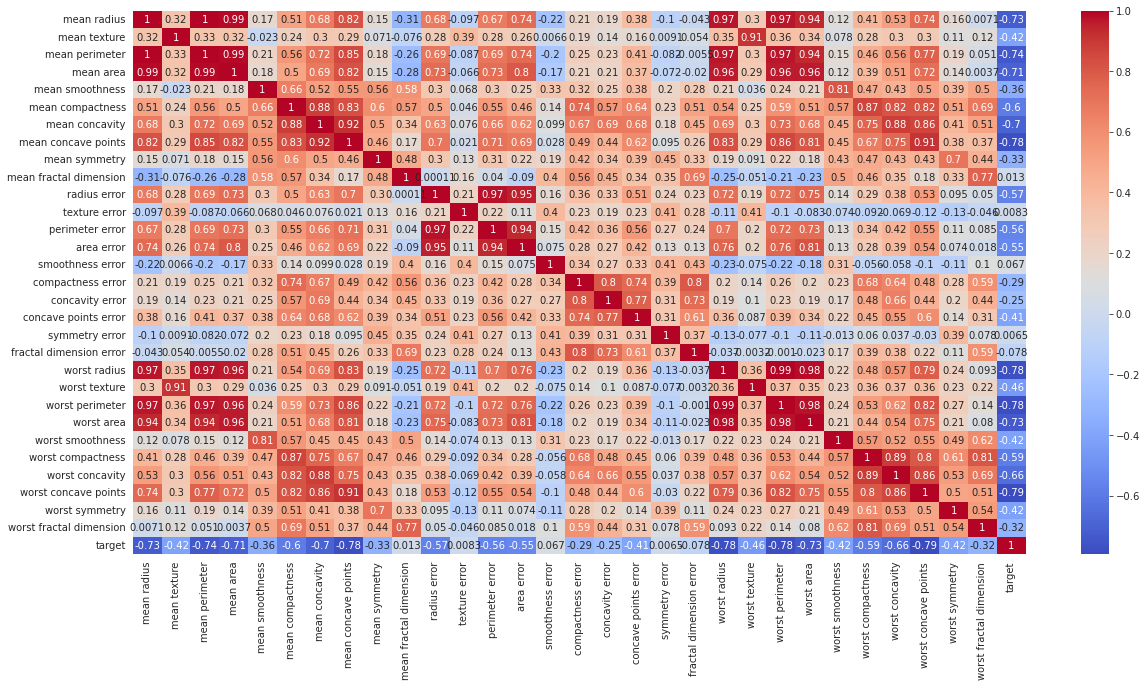

In [24]:
# Correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [27]:
# Pairplot
# sns.pairplot(df, hue='target')

Preprocessing:

1. Split the data into training and testing sets.
2. Standardize the features.
3. Encode the target variable.
4. Feature selection using SelectKBest.
5. Dimensionality reduction using PCA.
6. Model selection using GridSearchCV.
7. Model evaluation using cross-validation.
8. Model evaluation using classification report and confusion matrix.
9. Model evaluation using precision, recall, and F1 score.
10. Model evaluation using ROC curve and AUC score.

In [28]:
# Split the data into training and testing sets
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Encode the target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [32]:
models = {
    'SVM Linear': svm.SVC(kernel='linear', C=C),
    'SVM RBF': svm.SVC(kernel='rbf', gamma=0.7, C=C),
    'SVM Poly': svm.SVC(kernel='poly', degree=3, C=C)
}

In [33]:
# Train and evaluate each classifier
accuracies = { name : [] for name in models }
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name].append(accuracy)
    print(f'{name} accuracy: {accuracy:.4f}')

SVM Linear accuracy: 0.9561
SVM RBF accuracy: 0.6754
SVM Poly accuracy: 0.8684


In [35]:
# Evaluate using cross-validation
kf = StratifiedKFold ( n_splits =10 , shuffle = True , random_state =42)
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf)
    print(f'{name} cross-validation accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})')

SVM Linear cross-validation accuracy: 0.9561 (+/- 0.0179)
SVM RBF cross-validation accuracy: 0.6274 (+/- 0.0070)
SVM Poly cross-validation accuracy: 0.9122 (+/- 0.0376)


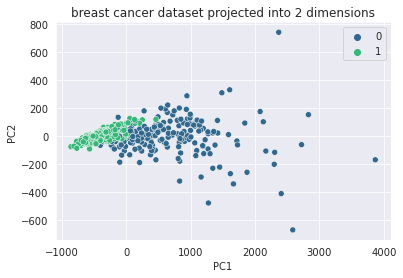

In [39]:

# Perform PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame with the projected data
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])


# Plot the entire Iris dataset projected into 2 dimensions using Seaborn
sns.scatterplot(data=pca_df, x='PC1', y='PC2', palette='viridis', hue=y)
plt.title('breast cancer dataset projected into 2 dimensions')
plt.show()

# Feature selection using SelectKBest (second method)

In [ ]:
# Feature selection using SelectKBest
select_k_best = SelectKBest(chi2, k=10)
X_train_k_best = select_k_best.fit_transform(X_train, y_train)
X_test_k_best = select_k_best.transform(X_test)

In [31]:
# Dimensionality reduction using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [ ]:
# Model selection using GridSearchCV
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('select_k_best', SelectKBest(chi2)),
    ('pca', PCA()),
    ('model', SVC())
])

# Data preprocessing

In [238]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(0)

# Generate synthetic data
data = {
    'id': range(1, 21),
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Edward', 'Frank', 'Grace', 'Helen', 'Ivy', 'Jack',
             'Alice', 'Bob', 'Charlie', 'David', 'Edward', 'Frank', 'Grace', 'Helen', 'Ivy', 'Jack'],
    'age': [25, np.nan, 35, 45, 29, np.nan, 34, 27, 29, 31,
            25, 28, 35, np.nan, 29, 32, 34, 27, 29, 31],
    'email': ['alice@example.com', 'bob@example.com', 'charlie@example.com', 'david@example.com', 'edward@example.com',
              'frank@example.com', 'grace@example.com', 'helen@example.com', 'ivy@example.com', 'jack@example.com',
              'alice@example.com', 'bob@example.com', 'charlie@example.com', 'david@example.com', 'edward@example.com',
              'frank@example.com', 'grace@example.com', 'helen@example.com', 'ivy@example.com', 'jack@example.com'],
    'date_of_birth': ['1995-01-01', '1990-06-15', '1985-09-23', '1975-03-30', '1991-07-19',
                      '1992-02-02', '1986-05-15', '1993-08-25', '1990-10-10', '1989-12-12',
                      '1995-01-01', '1990-06-15', '1985-09-23', '1975-03-30', '1991-07-19',
                      '1992-02-02', '1986-05-15', '1993-08-25', '1990-10-10', '1989-12-12'],
    'salary': ['50000', '60000', '70000', '80000', '90000',
               '50000', '60000', '70000', '80000', '90000',
               '50000', '60000', '70000', '80000', '90000',
               '50000', '60000', '70000', '80000', '90000'],
    'employment_duration': [2, 5, 10, 15, 7, 1, 4, 8, 3, 6, 2, 5, 10, 15, 7, 1, 4, 8, 3, 6],
    'education_level': ['Bachelors', 'Masters', 'PhD', 'Bachelors', 'Masters', 'PhD', 'Bachelors', 'Masters', 'PhD', 'Bachelors',
                        'Masters', 'PhD', 'Bachelors', 'Masters', 'PhD', 'Bachelors', 'Masters', 'PhD', 'Bachelors', 'Masters'],
    'job_title': ['Engineer', 'Scientist', 'Manager', 'Engineer', 'Scientist', 'Manager', 'Engineer', 'Scientist', 'Manager', 'Engineer',
                  'Scientist', 'Manager', 'Engineer', 'Scientist', 'Manager', 'Engineer', 'Scientist', 'Manager', 'Engineer', 'Scientist'],
    'department': ['R&D', 'R&D', 'HR', 'R&D', 'R&D', 'HR', 'R&D', 'R&D', 'HR', 'R&D',
                   'R&D', 'HR', 'R&D', 'R&D', 'HR', 'R&D', 'R&D', 'HR', 'R&D', 'R&D'],
    'location': ['New York', 'San Francisco', 'Chicago', 'New York', 'San Francisco', 'Chicago', 'New York', 'San Francisco', 'Chicago', 'New York',
                 'San Francisco', 'Chicago', 'New York', 'San Francisco', 'Chicago', 'New York', 'San Francisco', 'Chicago', 'New York', 'San Francisco']
}

# Create DataFrame
df = pd.DataFrame(data)
df


,id,name,age,email,date_of_birth,salary,employment_duration,education_level,job_title,department,location
0,1,Alice,25.0,alice@example.com,1995-01-01,50000,2,Bachelors,Engineer,R&D,New York
1,2,Bob,NaN,bob@example.com,1990-06-15,60000,5,Masters,Scientist,R&D,San Francisco
2,3,Charlie,35.0,charlie@example.com,1985-09-23,70000,10,PhD,Manager,HR,Chicago
3,4,David,45.0,david@example.com,1975-03-30,80000,15,Bachelors,Engineer,R&D,New York
4,5,Edward,29.0,edward@example.com,1991-07-19,90000,7,Masters,Scientist,R&D,San Francisco
5,6,Frank,NaN,frank@example.com,1992-02-02,50000,1,PhD,Manager,HR,Chicago
6,7,Grace,34.0,grace@example.com,1986-05-15,60000,4,Bachelors,Engineer,R&D,New York
7,8,Helen,27.0,helen@example.com,1993-08-25,70000,8,Masters,Scientist,R&D,San Francisco
8,9,Ivy,29.0,ivy@example.com,1990-10-10,80000,3,PhD,Manager,HR,Chicago
9,10,Jack,31.0,jack@example.com,1989-12-12,90000,6,Bachelors,Engineer,R&D,New York


In [239]:
df.drop_duplicates()

,id,name,age,email,date_of_birth,salary,employment_duration,education_level,job_title,department,location
0,1,Alice,25.0,alice@example.com,1995-01-01,50000,2,Bachelors,Engineer,R&D,New York
1,2,Bob,NaN,bob@example.com,1990-06-15,60000,5,Masters,Scientist,R&D,San Francisco
2,3,Charlie,35.0,charlie@example.com,1985-09-23,70000,10,PhD,Manager,HR,Chicago
3,4,David,45.0,david@example.com,1975-03-30,80000,15,Bachelors,Engineer,R&D,New York
4,5,Edward,29.0,edward@example.com,1991-07-19,90000,7,Masters,Scientist,R&D,San Francisco
5,6,Frank,NaN,frank@example.com,1992-02-02,50000,1,PhD,Manager,HR,Chicago
6,7,Grace,34.0,grace@example.com,1986-05-15,60000,4,Bachelors,Engineer,R&D,New York
7,8,Helen,27.0,helen@example.com,1993-08-25,70000,8,Masters,Scientist,R&D,San Francisco
8,9,Ivy,29.0,ivy@example.com,1990-10-10,80000,3,PhD,Manager,HR,Chicago
9,10,Jack,31.0,jack@example.com,1989-12-12,90000,6,Bachelors,Engineer,R&D,New York


In [240]:
df.isnull().sum()

id                     0
name                   0
age                    3
email                  0
date_of_birth          0
salary                 0
employment_duration    0
education_level        0
job_title              0
department             0
location               0
dtype: int64

In [241]:
df.columns

Index(['id', 'name', 'age', 'email', 'date_of_birth', 'salary',
       'employment_duration', 'education_level', 'job_title', 'department',
       'location'],
      dtype='object')

In [242]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [243]:
df['employment_duration'] = df['employment_duration'].astype(float)
df['salary'] = df['salary'].astype(float)
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')

In [244]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])

In [245]:
df['email'] = df['email'].fillna('missing@example.com')


In [246]:
df['date_of_birth'] = df['date_of_birth'].fillna(df['date_of_birth'].mode())

In [247]:
df['email'] = df['email'].str.lower()

In [248]:
df = pd.get_dummies(df, columns=['education_level','job_title', 'department', 'location'])    

In [249]:
df.drop(['id','name','email','date_of_birth'], axis=1, inplace=True)

In [250]:
df

,age,salary,employment_duration,education_level_Bachelors,education_level_Masters,education_level_PhD,job_title_Engineer,job_title_Manager,job_title_Scientist,department_HR,department_R&D,location_Chicago,location_New York,location_San Francisco
0,25.000000,50000.0,2.0,1,0,0,1,0,0,0,1,0,1,0
1,30.882353,60000.0,5.0,0,1,0,0,0,1,0,1,0,0,1
2,35.000000,70000.0,10.0,0,0,1,0,1,0,1,0,1,0,0
3,45.000000,80000.0,15.0,1,0,0,1,0,0,0,1,0,1,0
4,29.000000,90000.0,7.0,0,1,0,0,0,1,0,1,0,0,1
5,30.882353,50000.0,1.0,0,0,1,0,1,0,1,0,1,0,0
6,34.000000,60000.0,4.0,1,0,0,1,0,0,0,1,0,1,0
7,27.000000,70000.0,8.0,0,1,0,0,0,1,0,1,0,0,1
8,29.000000,80000.0,3.0,0,0,1,0,1,0,1,0,1,0,0
9,31.000000,90000.0,6.0,1,0,0,1,0,0,0,1,0,1,0


In [251]:
df.dtypes

age                          float64
salary                       float64
employment_duration          float64
education_level_Bachelors      uint8
education_level_Masters        uint8
education_level_PhD            uint8
job_title_Engineer             uint8
job_title_Manager              uint8
job_title_Scientist            uint8
department_HR                  uint8
department_R&D                 uint8
location_Chicago               uint8
location_New York              uint8
location_San Francisco         uint8
dtype: object

In [252]:
# Check for missing values after cleaning
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
age                          0
salary                       0
employment_duration          0
education_level_Bachelors    0
education_level_Masters      0
education_level_PhD          0
job_title_Engineer           0
job_title_Manager            0
job_title_Scientist          0
department_HR                0
department_R&D               0
location_Chicago             0
location_New York            0
location_San Francisco       0
dtype: int64


In [253]:
# save the cleaned data to a new CSV file and download it
df.to_csv('cleaned_data.csv', index=False)

In [254]:
X = df.drop('salary', axis=1)
y = df['salary']

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [256]:
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2)

In [257]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split

/home/gobi/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
293 fits failed with the following error:
Traceback (most recent call last):
  File "/home/gobi/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gobi/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/gobi/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/gobi/anac

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [261]:
# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score:.4f}")

Best parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best score: -0.8845


In [266]:
optimized_rf_model = grid_search.best_estimator_
optimized_rf_score = optimized_rf_model.score(X_test, y_test)
print(f"\nOptimized Random Forest Model R^2 Score: {optimized_rf_score:.2f}")



Optimized Random Forest Model R^2 Score: -1.24


In [267]:
mse = mean_squared_error(y_test, y_pred)

In [268]:
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 450000000.00


In [269]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=0)
gb_model.fit(X_train, y_train)
gb_score = gb_model.score(X_test, y_test)

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_score = ridge_model.score(X_test, y_test)

# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_score = lasso_model.score(X_test, y_test)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_score = linear_model.score(X_test, y_test)
# Random Forest 
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)
rf_score = rf_model.score(X_test, y_test)



print(f"\nGradient Boosting Model R^2 Score: {gb_score:.2f}")
print(f"Ridge Regression Model R^2 Score: {ridge_score:.2f}")
print(f"Lasso Regression Model R^2 Score: {lasso_score:.2f}")
print(f"Linear Regression Model R^2 Score: {linear_score:.2f}")
print(f"Random Forest Model R^2 Score: {rf_score:.2f}")


Gradient Boosting Model R^2 Score: -2.79
Ridge Regression Model R^2 Score: -1.84
Lasso Regression Model R^2 Score: -1.85
Linear Regression Model R^2 Score: -1.85
Random Forest Model R^2 Score: -2.59


# Decision Tree Classifier

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
clf = DecisionTreeClassifier(
    criterion="entropy", #  Using 'entropy' instead of 'gini'
    max_depth= 3, # # Limiting the maximum depth to 3
    min_samples_split=4, # Minimum 4 samples required to split an internal node
    min_samples_leaf=2, #  Minimum 2 samples required to be at a leaf node
    random_state=42 # for ensuring reproducibility
)

In [4]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       min_samples_split=4, random_state=42)

In [7]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_pred,y_test)
print(f"Accuracy score is : {accuracy: .2f}")

Accuracy score is :  0.98


[Text(0.375, 0.875, 'petal length (cm) <= 2.45\nentropy = 1.58\nsamples = 105\nvalue = [31, 37, 37]\nclass = versicolor'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = setosa'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'petal length (cm) <= 4.75\nentropy = 1.0\nsamples = 74\nvalue = [0, 37, 37]\nclass = versicolor'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'sepal length (cm) <= 4.95\nentropy = 0.196\nsamples = 33\nvalue = [0, 32, 1]\nclass = versicolor'),
 Text(0.125, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 31\nvalue = [0, 31, 0]\nclass = versicolor'),
 Text(0.75, 0.375, 'petal length (cm) <= 5.15\nentropy = 0.535\nsamples = 41\nvalue = [0, 5, 36]\nclass = virginica'),
 Text(0.625, 0.125, 'entropy = 0.918\nsamples = 15\nvalue = [0, 5, 10]\nclass = virginica'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 26\nvalue = [0, 0, 26]\nclass = virginica')]

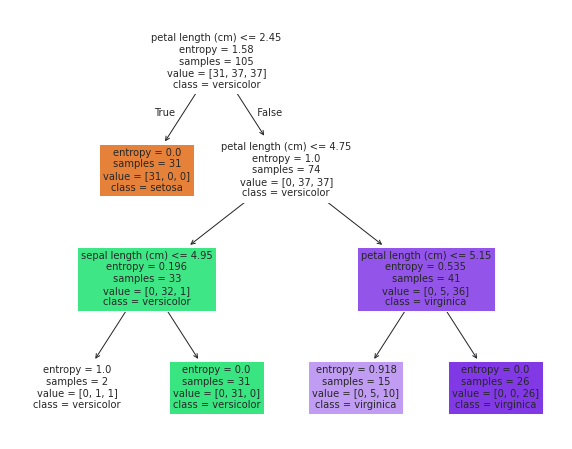

In [12]:
plt.figure(figsize=(10,8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)

## Perceptron

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
# Set random seed for reproducibility
np.random.seed(42)
# Generate a simple binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1

df = pd.DataFrame(X)
df["target"] = y
df

,0,1,target
0,1.228312,-0.757178,-1
1,0.698409,-1.380295,-1
2,2.548817,2.502258,1
3,0.573579,-1.352979,-1
4,0.585900,-1.337457,-1
...,...,...,...
95,0.473358,-1.438620,-1
96,1.233323,1.239336,1
97,0.460109,-1.487396,-1
98,0.679631,0.757837,1


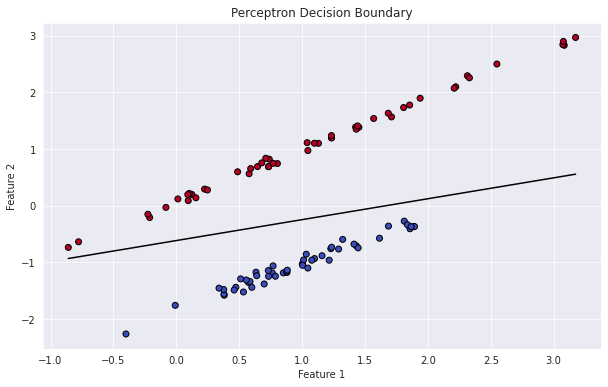

In [24]:
# Perceptron training function
def perceptron(X, y, learning_rate=0.01, n_iter=1000):
    w = np.zeros(X.shape[1])
    b = 0
    for _ in range(n_iter):
        for xi, yi in zip(X, y):
            if yi * (np.dot(xi, w) + b) <= 0:
                w += learning_rate * yi * xi
                b += learning_rate * yi
    return w, b

# Train the Perceptron
w, b = perceptron(X, y)

# Function to plot the decision boundary
def plot_decision_boundary(X, y, w, b):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')

    # Plot the decision boundary
    x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x2 = -(w[0] * x1 + b) / w[1]
    plt.plot(x1, x2, 'k-')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, w, b)
